1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

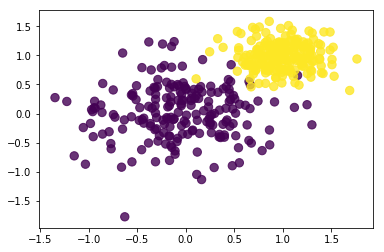

In [1]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


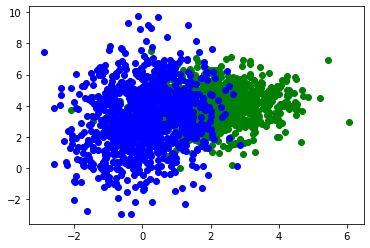

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_data(size, mean, cov) :    
    data = np.random.multivariate_normal(mean, cov, size)
    df = pd.DataFrame(data, columns = ['x', 'y'])

    return df

mean_1, cov_1 = [2, 4], [(1, .7), (.6, -1)]
mean_2, cov_2 = [0, 3], [(1, .2), (.3, 4)]
df_1 = generate_data(1000, mean_1, cov_1)
df_2 = generate_data(1000, mean_2, cov_2)

fig, ax = plt.subplots()
ax.scatter(x='x', y='y', data=df_1, c='g')
ax.scatter(x='x', y='y', data=df_2, c='b')

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

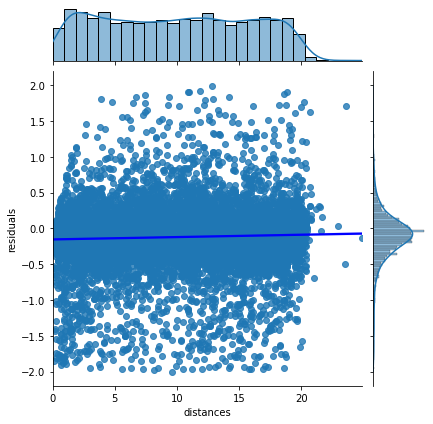

In [15]:
import seaborn as sns

#part 1
data = np.load('residuals_261.pkl',allow_pickle=True)
df = pd.DataFrame(data.item())

df_cleaned = df[df['residuals'].abs() < 2]
df_cleaned

sns.jointplot(x = 'distances', y = 'residuals', data = df_cleaned, kind='reg', line_kws = {'color': 'blue'})

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


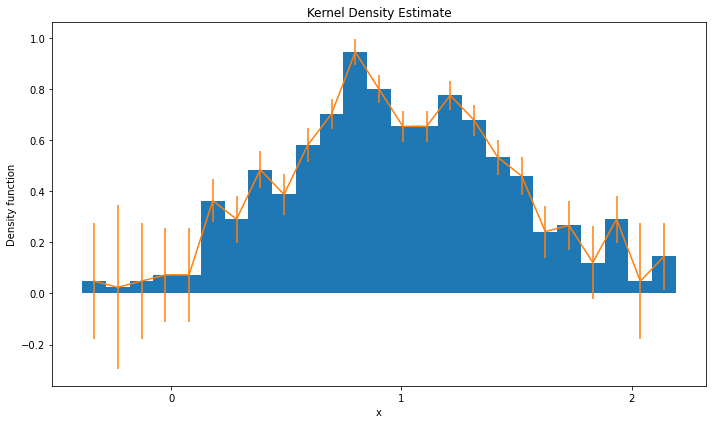

In [16]:
import math

np.random.seed(0)

mean, std, size = 1, 0.5, 400
x = np.random.normal(mean, std, size)

fig, ax = plt.subplots(figsize=(10, 6))
h, bins, _ = plt.hist(x, bins=25, density=True)
ticks = list(range(math.floor(x.min()), math.ceil(x.max())+1))

ax.set_title('Kernel Density Estimate')
ax.set_xlabel('x')
ax.set_ylabel('Density function')
ax.set_xticks(ticks)

centers = 0.5 * (bins[:-1] + bins[1:])
h_err = np.divide(1, np.sqrt(h*size), where=h!=0)
ax.errorbar(centers, h, yerr=h_err)

fig.tight_layout()